<a href="https://colab.research.google.com/github/kolallen/OASIS_Data_Analytics_Internship_Task-4/blob/main/OASIS_INFOBYTE_Internship_Data_Analytics_Project_4_Level_1_Sentiment_Analysis_Play_Store_Sentiment_Analysis_of_User_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Google Play Store apps and reviews**

In [ ]:
# Read in dataset
import pandas as pd

apps_with_duplicates = pd.read_csv('apps_task_4.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps['App'].count())

# Have a look at a random sample of 5 entries
n=5
apps.sample(n)


Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8152,9272,EF English Live Business,FAMILY,3.6,496,14M,"100,000+",Free,0,Everyone,Education,4-May-18,2.0.1,4.4 and up
8514,9653,EO Events,BUSINESS,NaN,0,11M,10+,Free,0,Teen,Business,21-Jun-18,v2.7.11.27,4.1 and up
38,38,PIP Camera - PIP Collage Maker,ART_AND_DESIGN,4.7,158,11M,"10,000+",Free,0,Everyone,Art & Design,29-Nov-17,1.3,4.0.3 and up
787,998,LOL Pics (Funny Pictures),ENTERTAINMENT,4.4,67554,7.7M,"1,000,000+",Free,0,Teen,Entertainment,15-Sep-15,4,2.3.3 and up
1136,1376,"Technutri - calorie counter, diet and carb tra...",HEALTH_AND_FITNESS,4.4,70416,23M,"5,000,000+",Free,0,Everyone,Health & Fitness,27-Jul-18,3.19.4,4.1 and up


**Data cleaning**

In [ ]:
chars_to_remove = ['+', ',', 'M', '$']
cols_to_clean = ['Installs', 'Size', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace the characters in each column col with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])

**Exploring app categories**

In [ ]:
import plotly
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(set(apps['Category']))
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them for easier plotting
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

fig = go.Figure(data = data)
fig.show()

Number of categories =  33


**Distribution of app ratings**

In [ ]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating'],
        xbins = {'start': 1, 'size': 0.1, 'end' : 5}
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

fig = go.Figure(data = data, layout = layout)
fig.show()

Average app rating =  4.173243045387994


**Size and price of an app**

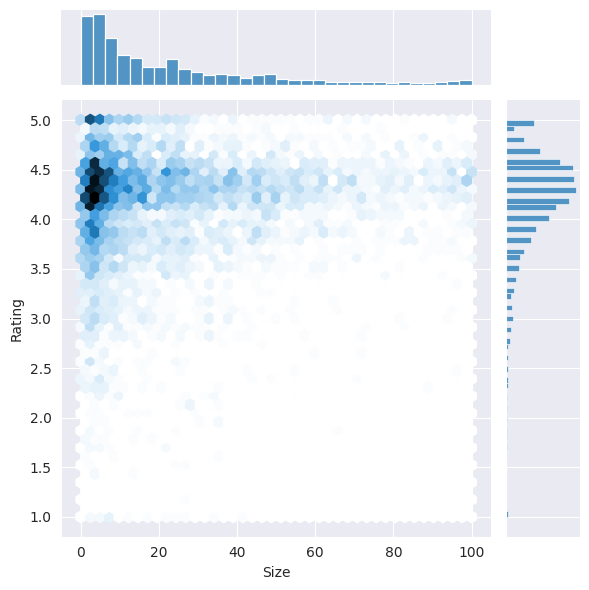

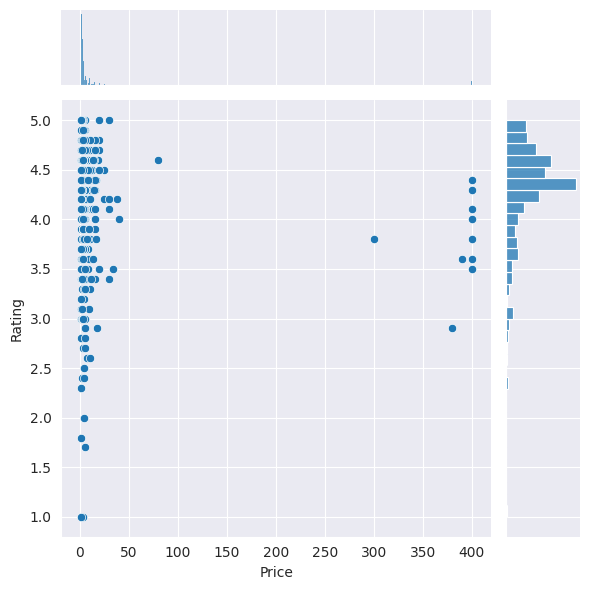

In [ ]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = 'Size', y = 'Rating', data = large_categories, kind = 'hex')

# Subset for paid apps only
paid_apps = apps[apps['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = 'Price', y = 'Rating', data = paid_apps)

**Relation between app category and app price**

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


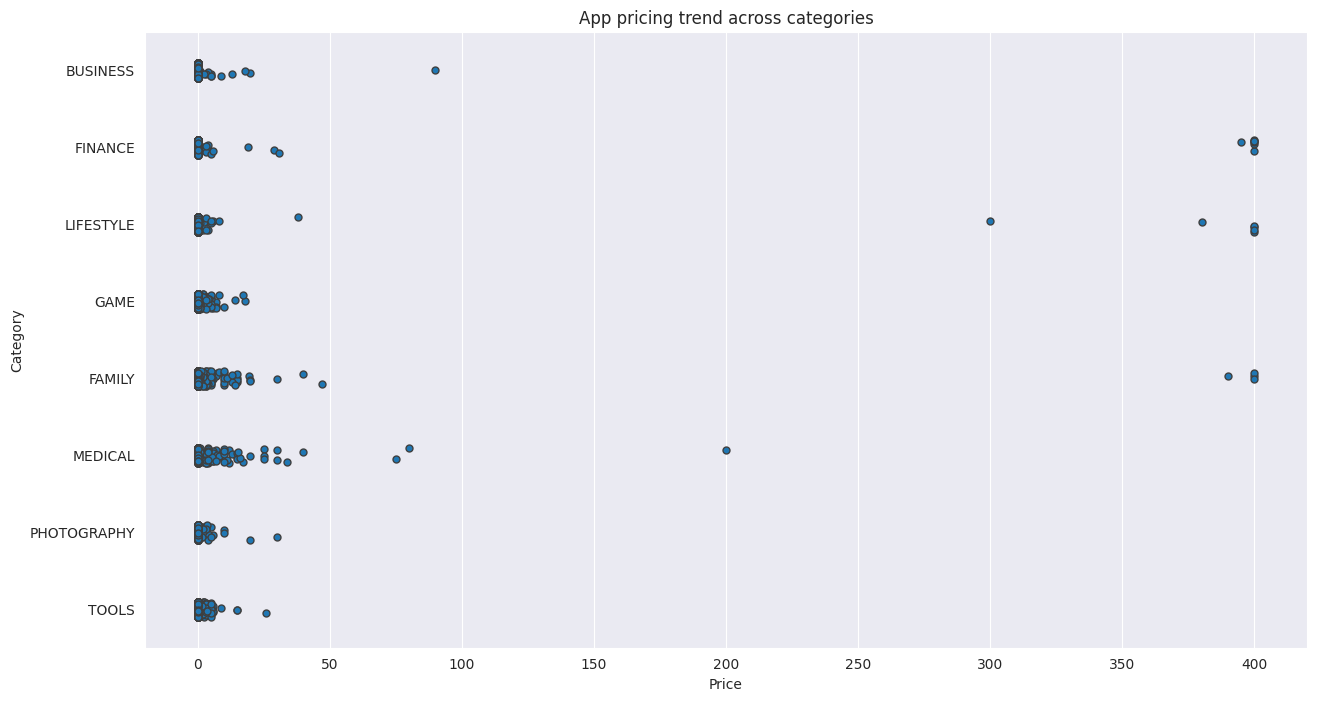

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend for the subset of categories
ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Category, Name and Price of apps priced above $200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

**Filter out "junk" apps**

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

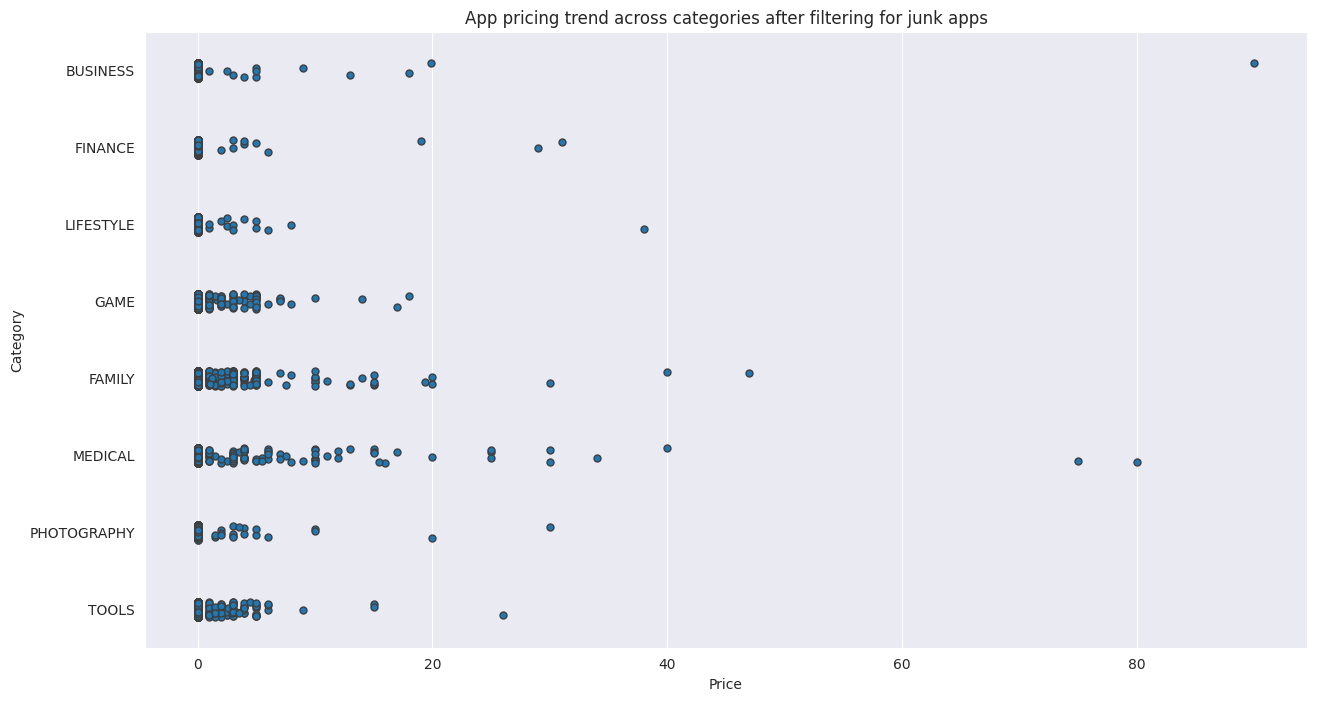

In [ ]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

**Popularity of paid apps vs free apps**

In [ ]:
trace0 = go.Box(
    # Data for paid apps
    y=apps['Installs'][apps['Type'] == 'Paid'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps['Installs'][apps['Type'] == 'Free'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
fig = go.Figure(data = data, layout = layout)
fig.show()

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

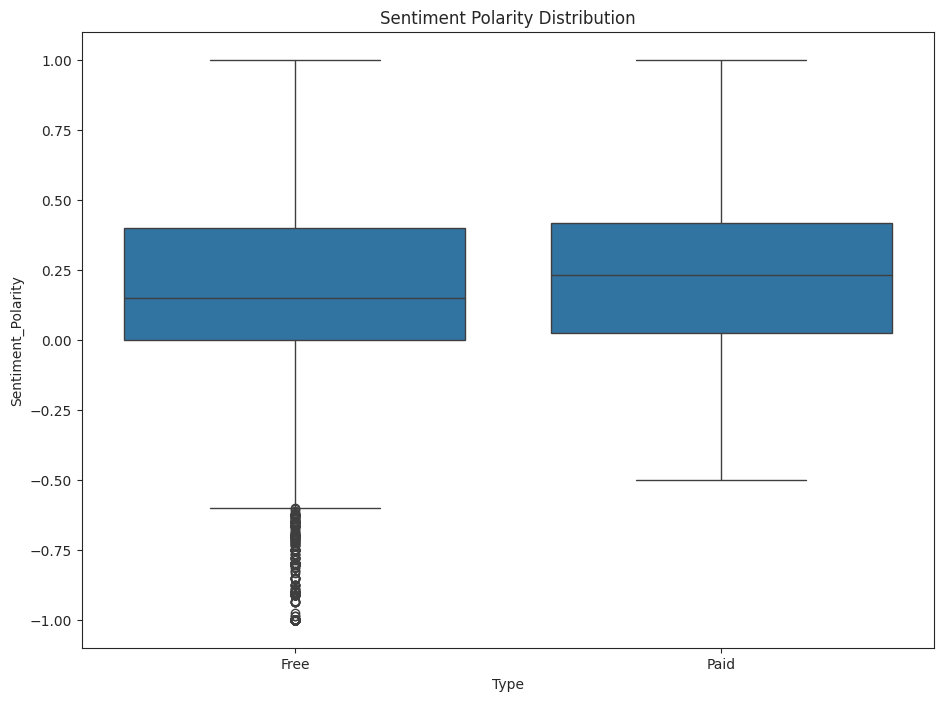

In [ ]:
# Load user_reviews.csv
reviews_df = pd.read_csv('user_reviews_task_4.csv')

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on='App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')